#**Real Estate Price Prediction Model**

#**Ampang District**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

In [ ]:
# Load dataset
df = pd.read_csv('Cleaned Ampang District.csv')
df

,DISTRICT,DATE_OF_VALUATION,LOT_SIZE,CATEGORY,SECTOR,PRO_TYPE,NO_OF_FLOOR,ALAMAT,SCHEME,PRICE,YEAR
0,Mukim Ampang,10/10/2019,1532.000,Detached House,Residential,Detached,2.0,"110C TMN U-THANT,JLN U-THANT","39,LINGKUNGAN U-THANT",8300000,2019
1,Mukim Ampang,6/1/2020,1451.000,Vacant Residential Plot,Residential,Vacant Plot,0.0,"97,JLN U-THANT",LINGKUNGAN U-THANT,8000000,2020
2,Mukim Ampang,2/2/2021,1086.000,Vacant Residential Plot,Residential,Vacant Plot,0.0,"LOT 9522,JALAN KERANJI 1",KAW JLN AMPANG/AMPANG HILIR,7948935,2021
3,Mukim Ampang,23/6/2017,743.000,Detached House,Residential,Detached,2.0,"NO. 21,JLN KERANJI 2",KAW JLN AMPANG/AMPANG HILIR,5700000,2017
4,Mukim Ampang,27/8/2020,1204.150,Detached House,Residential,Detached,2.0,"7,JLN.MENGKUANG",KAW JLN AMPANG/AMPANG HILIR,4800000,2020
...,...,...,...,...,...,...,...,...,...,...,...
670,Mukim Ampang,19/4/2018,60.385,Low-Cost Flat,Residential,Low-Cost Flat,18.0,"A-12-19,JLN LINGKARAN TENGAH II",PPR HILIRAN AMPANG,35000,2018
671,Mukim Ampang,7/4/2017,60.000,Low-Cost Flat,Residential,Low-Cost Flat,18.0,"B-02-03,JLN LINGKARAN TENGAH II",PPR HILIRAN AMPANG,35000,2017
672,Mukim Ampang,8/5/2019,60.385,Low-Cost Flat,Residential,Low-Cost Flat,18.0,"B-13-19,JLN LINGKARAN TENGAH II",PPR HILIRAN AMPANG,35000,2019
673,Mukim Ampang,2/10/2017,60.385,Low-Cost Flat,Residential,Low-Cost Flat,18.0,"C-09-10,JLN LINGKARAN TENGAH II",PPR HILIRAN AMPANG,35000,2017


In [ ]:
# Check if there is missing values in each column
df.isnull().sum()

DISTRICT             0
DATE_OF_VALUATION    0
LOT_SIZE             0
CATEGORY             0
SECTOR               0
PRO_TYPE             0
NO_OF_FLOOR          0
ALAMAT               0
SCHEME               0
PRICE                0
YEAR                 0
dtype: int64

In [ ]:
# Check the data types of each column
df.dtypes

DISTRICT              object
DATE_OF_VALUATION     object
LOT_SIZE             float64
CATEGORY              object
SECTOR                object
PRO_TYPE              object
NO_OF_FLOOR          float64
ALAMAT                object
SCHEME                object
PRICE                  int64
YEAR                   int64
dtype: object

#Adding new column 'Price per Square Meter'

In [ ]:
# Adding new column ("price_per_sqm") to dataframe
df['price_per_sqm'] = df['PRICE'] / df['LOT_SIZE']
df['price_per_sqm'] = df['price_per_sqm'].round(2)
df.sort_values(by='YEAR')
df.reset_index(drop=True, inplace=True)
df

,DISTRICT,DATE_OF_VALUATION,LOT_SIZE,CATEGORY,SECTOR,PRO_TYPE,NO_OF_FLOOR,ALAMAT,SCHEME,PRICE,YEAR,price_per_sqm
0,Mukim Ampang,10/10/2019,1532.000,Detached House,Residential,Detached,2.0,"110C TMN U-THANT,JLN U-THANT","39,LINGKUNGAN U-THANT",8300000,2019,5417.75
1,Mukim Ampang,6/1/2020,1451.000,Vacant Residential Plot,Residential,Vacant Plot,0.0,"97,JLN U-THANT",LINGKUNGAN U-THANT,8000000,2020,5513.44
2,Mukim Ampang,2/2/2021,1086.000,Vacant Residential Plot,Residential,Vacant Plot,0.0,"LOT 9522,JALAN KERANJI 1",KAW JLN AMPANG/AMPANG HILIR,7948935,2021,7319.46
3,Mukim Ampang,23/6/2017,743.000,Detached House,Residential,Detached,2.0,"NO. 21,JLN KERANJI 2",KAW JLN AMPANG/AMPANG HILIR,5700000,2017,7671.60
4,Mukim Ampang,27/8/2020,1204.150,Detached House,Residential,Detached,2.0,"7,JLN.MENGKUANG",KAW JLN AMPANG/AMPANG HILIR,4800000,2020,3986.21
...,...,...,...,...,...,...,...,...,...,...,...,...
670,Mukim Ampang,19/4/2018,60.385,Low-Cost Flat,Residential,Low-Cost Flat,18.0,"A-12-19,JLN LINGKARAN TENGAH II",PPR HILIRAN AMPANG,35000,2018,579.61
671,Mukim Ampang,7/4/2017,60.000,Low-Cost Flat,Residential,Low-Cost Flat,18.0,"B-02-03,JLN LINGKARAN TENGAH II",PPR HILIRAN AMPANG,35000,2017,583.33
672,Mukim Ampang,8/5/2019,60.385,Low-Cost Flat,Residential,Low-Cost Flat,18.0,"B-13-19,JLN LINGKARAN TENGAH II",PPR HILIRAN AMPANG,35000,2019,579.61
673,Mukim Ampang,2/10/2017,60.385,Low-Cost Flat,Residential,Low-Cost Flat,18.0,"C-09-10,JLN LINGKARAN TENGAH II",PPR HILIRAN AMPANG,35000,2017,579.61


**Average/median price per square meter for each property scheme/condominium

The Methodology:
1. Filter by Condominium Properties
2. Calculate each row price per square meter
3. Group by Year and Scheme and get the Median
4. Graph


In [ ]:
# Filter condominium property type
sorted_data = df.sort_values(by=['SCHEME', 'YEAR'])
filter_data = sorted_data.loc[df['CATEGORY'] == 'Condominium/Apartment']
filter_data

filter1 = filter_data[['LOT_SIZE', 'PRICE', 'SCHEME', 'YEAR']].reset_index()

# Add a new column to get Price per Square Meter of each condo
filter2 = filter1
filter2['price_per_sqm'] = filter1['PRICE'] / filter1['LOT_SIZE']
filter2['price_per_sqm'] = filter1['price_per_sqm'].round(2)

# Sort dataframe by year
filter2.sort_values(by='YEAR')

,index,LOT_SIZE,PRICE,SCHEME,YEAR,price_per_sqm
115,378,88.0,340000,DESA PANDAN,2017,3863.64
108,174,137.0,623000,DESA PANDAN,2017,4547.45
158,137,193.0,800000,MUTIARA UPPER EAST CONDO,2017,4145.08
157,115,159.0,900000,MUTIARA UPPER EAST CONDO,2017,5660.38
156,109,145.0,925000,MUTIARA UPPER EAST CONDO,2017,6379.31
...,...,...,...,...,...,...
230,276,140.0,417680,WICKHAM MANOR,2020,2983.43
105,361,79.0,350000,CASA RIA,2021,4430.38
217,275,93.0,420000,PERTIWI INDAH APARTMENT,2021,4516.13
106,250,121.0,440000,CATALINA VILLA,2021,3636.36


In [ ]:
# Get the average of each scheme's price/sqm by year
groupScheme = filter2.groupby(['SCHEME','YEAR'])
averagePrice = groupScheme['price_per_sqm'].median().reset_index()
averagePrice # 42 entries

# For graph comparison below
sortByPrice = averagePrice.sort_values(by=['YEAR', 'price_per_sqm'])
sortByPrice

,SCHEME,YEAR,price_per_sqm
21,MENARA POLO,2017,3768.120
4,BAM VILLAS,2017,3973.950
14,DESA PANDAN,2017,4207.735
8,CASA RIA,2017,4301.080
17,GCB COURT,2017,4450.125
40,WICKHAM MANOR,2017,5080.210
30,PERTIWI INDAH APARTMENT,2017,5155.420
35,TARA KONDOMINIUM,2017,5727.510
25,MUTIARA UPPER EAST CONDO,2017,6764.100
15,DESA PANDAN,2018,3409.095


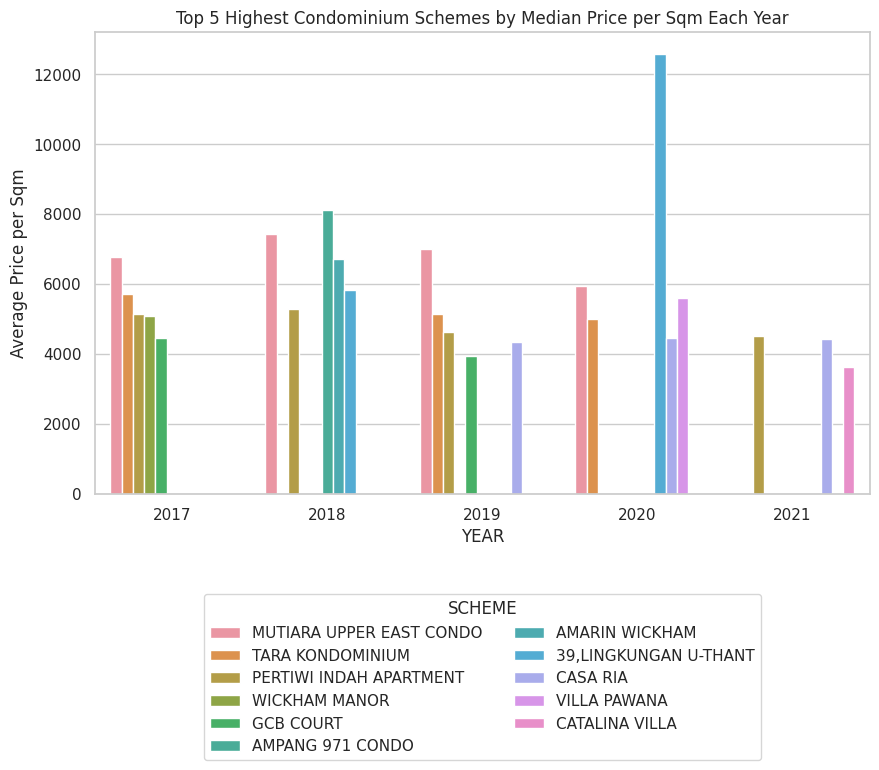

In [ ]:
# Create a grouped bar chart

# Selecting the top 5 for each year
top_5_by_year = averagePrice.groupby('YEAR').apply(lambda x: x.nlargest(5, 'price_per_sqm')).reset_index(drop=True)

# Set seaborn style
sns.set(style="whitegrid")

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_by_year, x='YEAR', y='price_per_sqm', hue='SCHEME')

plt.xlabel('YEAR')
plt.ylabel('Average Price per Sqm')
plt.title('Top 5 Highest Condominium Schemes by Median Price per Sqm Each Year')
plt.legend(title='SCHEME', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Show the plot
plt.show()

In [ ]:
# From original dataframe
outlierCheck = averagePrice[(averagePrice['SCHEME'] == 'LINGKUNGAN U-THANT')]
outlierCheck

# Double price for smaller lot_size!

,SCHEME,YEAR,price_per_sqm


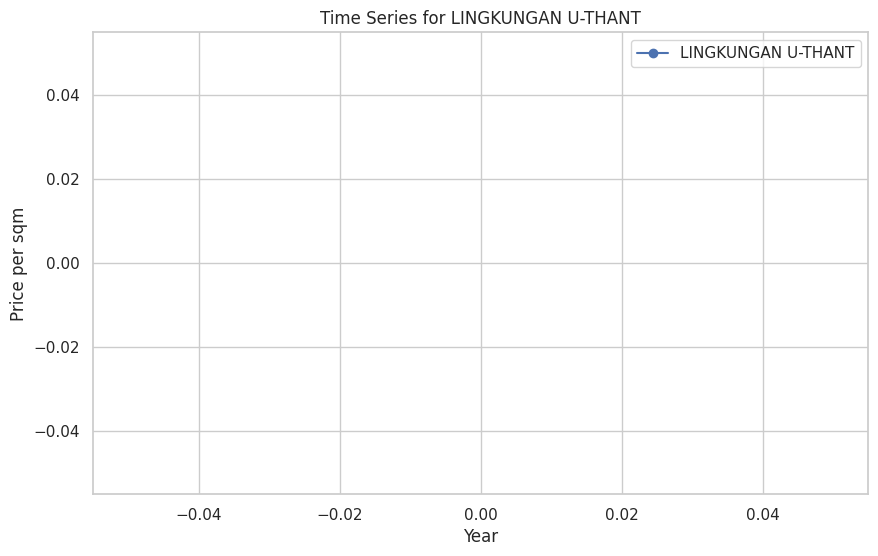

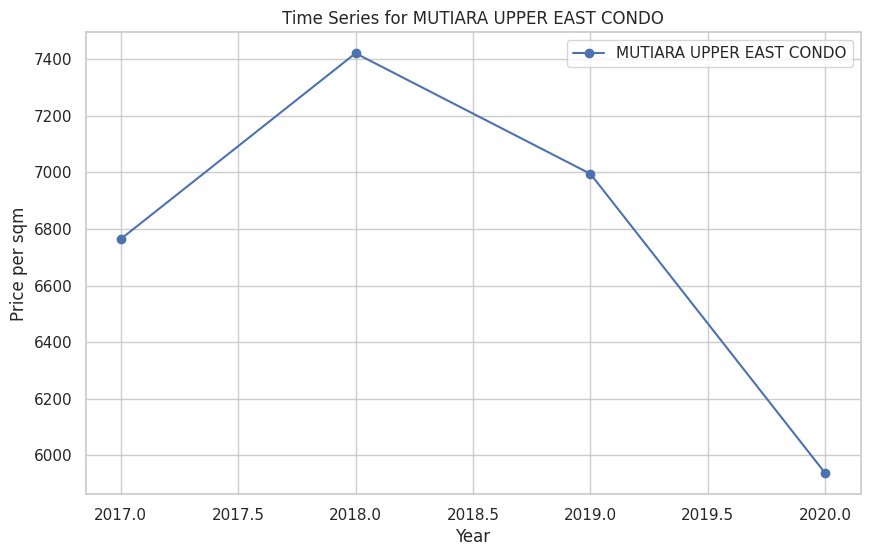

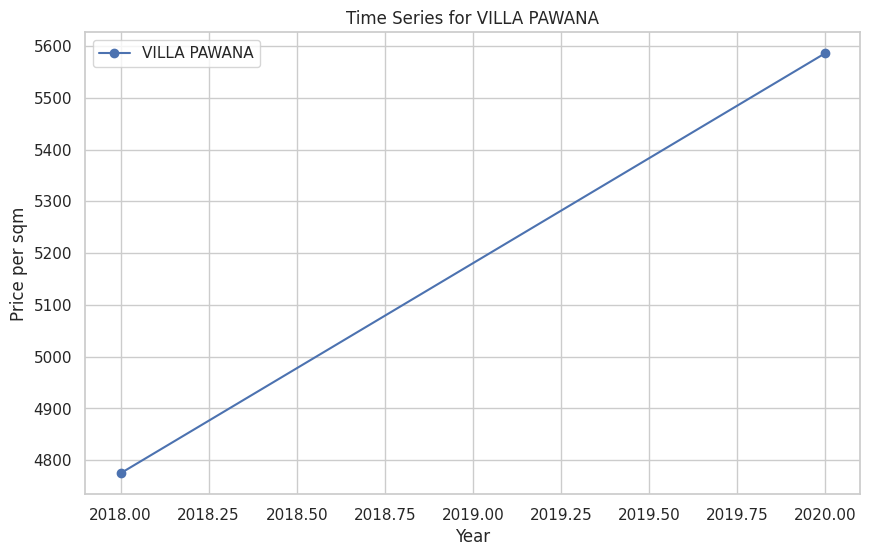

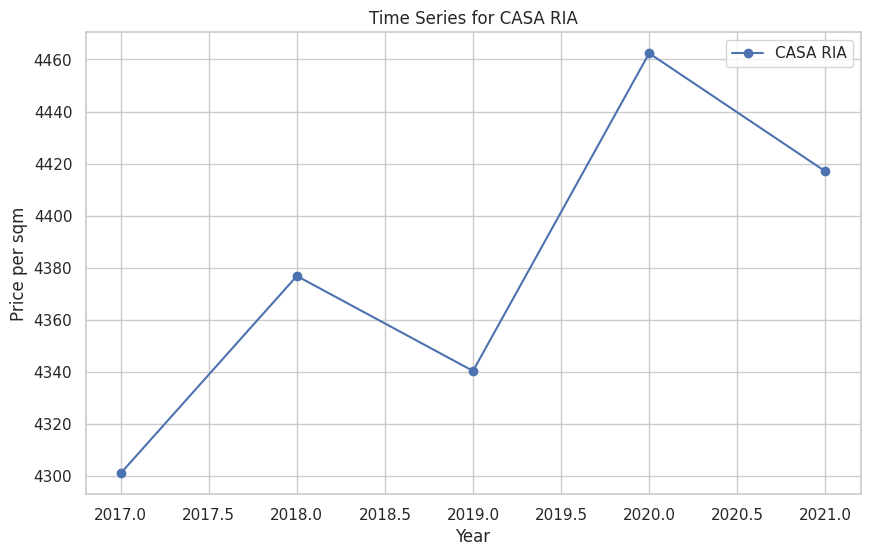

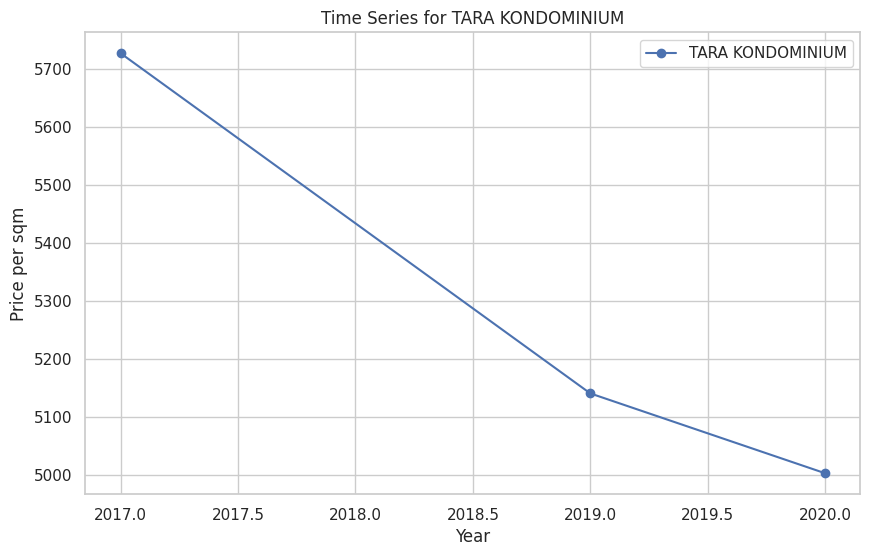

In [ ]:
# Trend analysis of top 5 schemes in 2020
top5trans = ['LINGKUNGAN U-THANT', 'MUTIARA UPPER EAST CONDO', 'VILLA PAWANA', 'CASA RIA', 'TARA KONDOMINIUM']

# For graph below
grouped = averagePrice.sort_values(by=['YEAR', 'price_per_sqm'])
grouped.reset_index(drop=True, inplace=True)
grouped

for scheme in top5trans:
  scheme_data = grouped[grouped['SCHEME'] == scheme]
  plt.figure(figsize=(10, 6))
  plt.title(f'Time Series for {scheme}') # Set the title
  plt.plot(scheme_data['YEAR'], scheme_data['price_per_sqm'], marker='o', label=scheme)
  plt.xlabel('Year') # Set the x-axis label
  plt.ylabel('Price per sqm') # Set the y-axis label
  plt.legend() # Show legend
  plt.grid(True) # Add gridlines if needed
  plt.show() # Show the plot for the current scheme


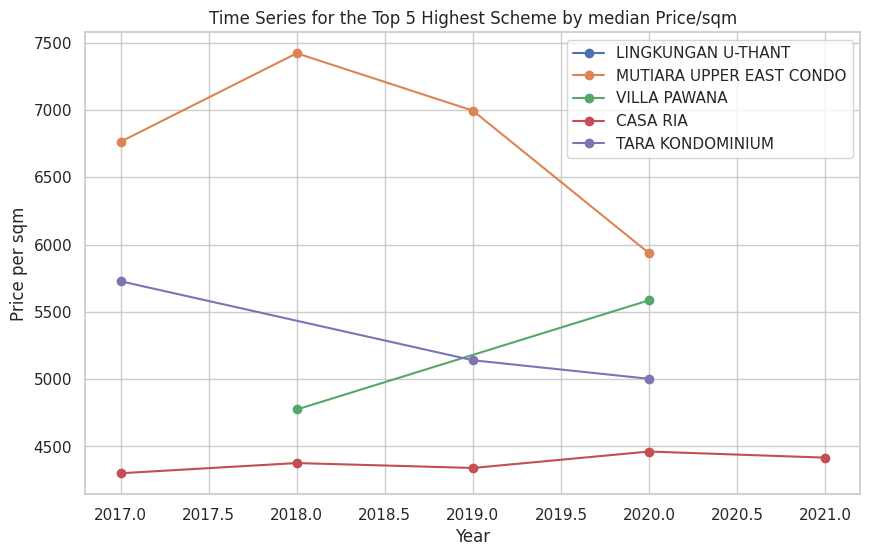

In [ ]:
top5trans = ['LINGKUNGAN U-THANT', 'MUTIARA UPPER EAST CONDO', 'VILLA PAWANA', 'CASA RIA', 'TARA KONDOMINIUM']
plt.figure(figsize=(10, 6))

for scheme in top5trans:
  scheme_data = grouped[grouped['SCHEME'] == scheme]
  plt.plot(scheme_data['YEAR'], scheme_data['price_per_sqm'], marker='o', label=scheme)

plt.title(f'Time Series for the Top 5 Highest Scheme by median Price/sqm')  # Set the title
plt.xlabel('Year') # Set the x-axis label
plt.ylabel('Price per sqm') # Set the y-axis label
plt.legend() # Show legend
plt.grid(True) # Add gridlines if needed
plt.show() # Show the plot for the current scheme

## Comparative Question

**Highest appreciation of the property type over the last 5 years

In [ ]:
# Code belows calculates Average of each property type in each year

# Sort data by type and year

# Create separate dataframe of each property type
property_type_dfs = {}
for property_type, group in df.groupby('CATEGORY'):
  property_type_dfs[property_type] = group

condo_df = property_type_dfs['Condominium/Apartment']
#flat_df  = property_type_dfs['Flat']
#terrace_df = property_type_dfs['Terraced House']
#lowFlat_df = property_type_dfs['Low-Cost Flat']
#town_df = property_type_dfs['Town Houses']
#detached_df = pd.concat([property_type_dfs['Detached House'], property_type_dfs['Semi-Detached House']])
#plot_df = property_type_dfs['Vacant Residential Plot']

# THE IDEA
# 1. Average each property type in each year
# 2. Calculate the appreciation values

# Calculate the average price/sqm for each property type by year
average_prices_by_year = {}
for property_type, df_property in property_type_dfs.items():
    average_prices_by_year[property_type] = df_property.groupby('YEAR')['price_per_sqm'].median()

# Creating dataframe (that calculates the average every year) by property type
condo_dfAverage = average_prices_by_year['Condominium/Apartment']
flat_dfAverage = average_prices_by_year['Flat']
terrace_dfAverage = average_prices_by_year['Terraced House']
lowFlat_dfAverage = average_prices_by_year['Low-Cost Flat']
town_dfAverage = average_prices_by_year['Town Houses']
detached_dfAverage = pd.concat([average_prices_by_year['Detached House'], average_prices_by_year['Semi-Detached House']])
plot_dfAverage = average_prices_by_year['Vacant Residential Plot']

In [ ]:
# checking average of plot
plot_dfAverage

YEAR
2017    2127.66
2018    1468.68
2019    1454.55
2020    2110.09
2021    7319.46
Name: price_per_sqm, dtype: float64

In [ ]:
# Code belows calculates Appreciation Value of each property type
property_types_to_check = ['Condominium/Apartment', 'Flat', 'Terraced House', 'Low-Cost Flat', 'Town Houses', 'Detached House', 'Semi-Detached House', 'Vacant Residential Plot']

# Create a dictionary to store appreciation value for each property type
appreciation_by_property_type = {}

# Dictionary for future appreciation value in 5 years
future_appreciation = {}

# Iterate through each property type
for property_type_to_check in property_types_to_check:
    # Check if the property type exists in the data
    if property_type_to_check in property_type_dfs:
        df_property = property_type_dfs[property_type_to_check]
        avg_prices = average_prices_by_year[property_type_to_check]

        # Sort the years in ascending order
        years = sorted(avg_prices.index)

        # Initialise the time over the 5 years [2017,2018,2019,2020,2021]
        last_5_years = years[-5:] # Count from fifth to last
        initial_year = last_5_years[0]
        final_year = last_5_years[-1] # Last element aka the latest

        initial_price = avg_prices[initial_year]
        final_price = avg_prices[final_year]

        # Calculate Appreciation Value
        appreciation = (((final_price - initial_price) / initial_price)) / 5

        # Store the appreciation value in the dictionary
        appreciation_by_property_type[property_type_to_check] = appreciation


        print(f"Appreciation Rate for '{property_type_to_check}' over the last 5 years: {appreciation:.2%}")
    else:
        print(f"Property type '{property_type_to_check}' not found in the data.")

Appreciation Rate for 'Condominium/Apartment' over the last 5 years: 0.06%
Appreciation Rate for 'Flat' over the last 5 years: 4.84%
Appreciation Rate for 'Terraced House' over the last 5 years: 2.29%
Appreciation Rate for 'Low-Cost Flat' over the last 5 years: 8.06%
Appreciation Rate for 'Town Houses' over the last 5 years: 1.16%
Appreciation Rate for 'Detached House' over the last 5 years: 19.04%
Appreciation Rate for 'Semi-Detached House' over the last 5 years: 1.95%
Appreciation Rate for 'Vacant Residential Plot' over the last 5 years: 48.80%


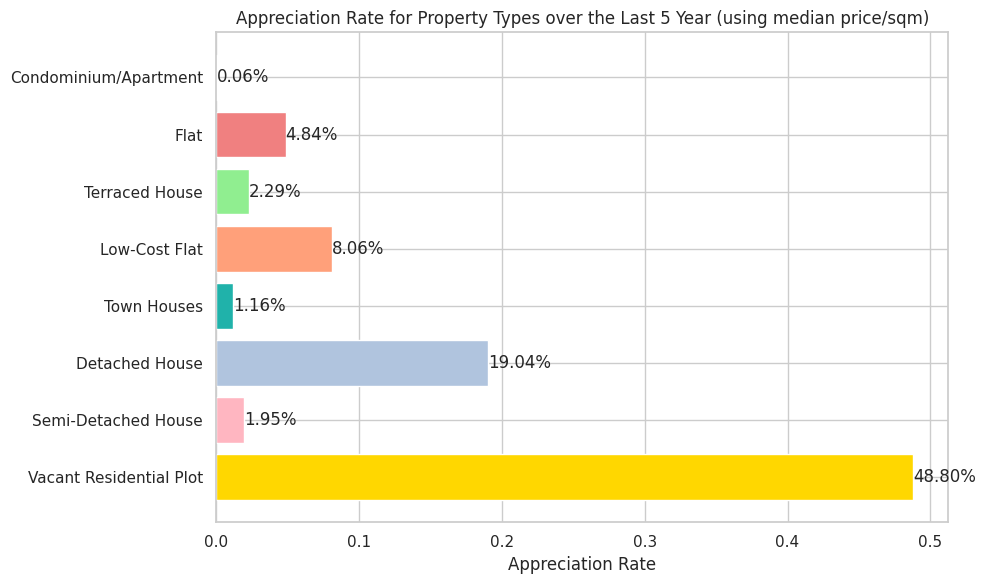

In [ ]:
# Code below graphs the appreciation rate

# Extract property types and their respective appreciation rates
property_types = list(appreciation_by_property_type.keys())
appreciation_rates = list(appreciation_by_property_type.values())

# Define a list of colors for each bar
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen', 'lightsteelblue', 'lightpink', 'gold']

# Create a bar chart with custom colors
plt.figure(figsize=(10, 6))
bars = plt.barh(property_types, appreciation_rates, color=colors)
plt.xlabel('Appreciation Rate')
plt.title('Appreciation Rate for Property Types over the Last 5 Year (using median price/sqm)') #Using Median price
plt.gca().invert_yaxis() # Invert the y-axis to show the highest rate at the top

# Annotate the bars with the appreciation rates
for bar, rate in zip(bars, appreciation_rates):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{rate:.2%}', va='center')

# Show the plot
plt.tight_layout()
plt.grid(True)
plt.show()

## Exploratory Question

**Strongest correlation of property features (scheme, lot size, type) with property prices

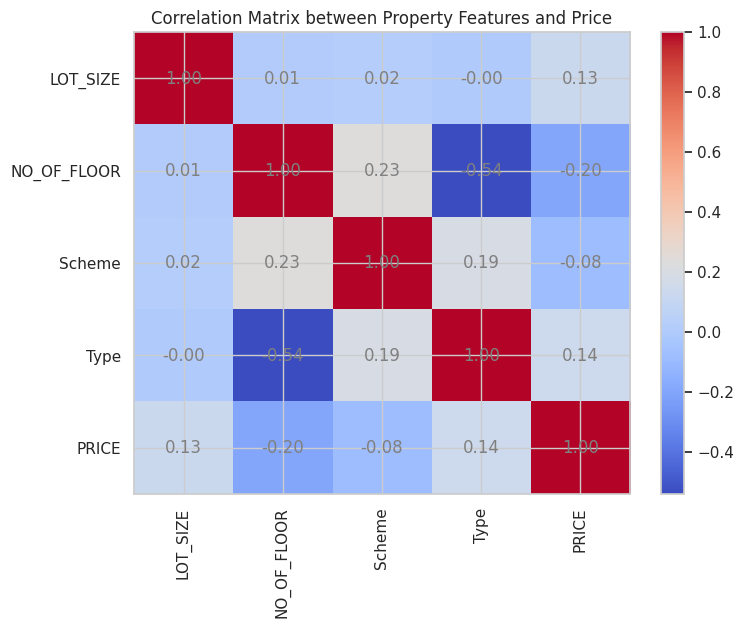

Correlation between Scheme and Property Price: -0.08
Correlation between Lot Size and Property Price: 0.13
Correlation between Type and Property Price: 0.14


In [ ]:
df2 = df

# Encoding property scheme to numerical values:
df2['Scheme'] = df['SCHEME'].astype('category').cat.codes
correlation_scheme = df['Scheme'].corr(df['PRICE'])

# Calculate Pearson correlation coefficient between property prices and features
correlation_lot_size = df['LOT_SIZE'].corr(df['PRICE'])

# Encoding property category to numerical values:
df2['Type'] = df['CATEGORY'].astype('category').cat.codes
correlation_type = df['Type'].corr(df['PRICE'])

selected_columns = ['LOT_SIZE','NO_OF_FLOOR','Scheme','Type','PRICE']
selected_df = df[selected_columns]
correlation_matrix =selected_df.corr()

# Create a heatmap-style visualization of the correlation matrix
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')

# Add annotation values to the cells
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='gray')

plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix between Property Features and Price')
plt.show()

# Print correlation values
print(f'Correlation between Scheme and Property Price: {correlation_scheme:.2f}')
print(f'Correlation between Lot Size and Property Price: {correlation_lot_size:.2f}')
print(f'Correlation between Type and Property Price: {correlation_type:.2f}')

**The trend/inflation rate of property price for condominium in Ampang for the last 5 years

[0.0, inf, -11.443620470339052, -1.188517996703571, 2.3637635153861196]



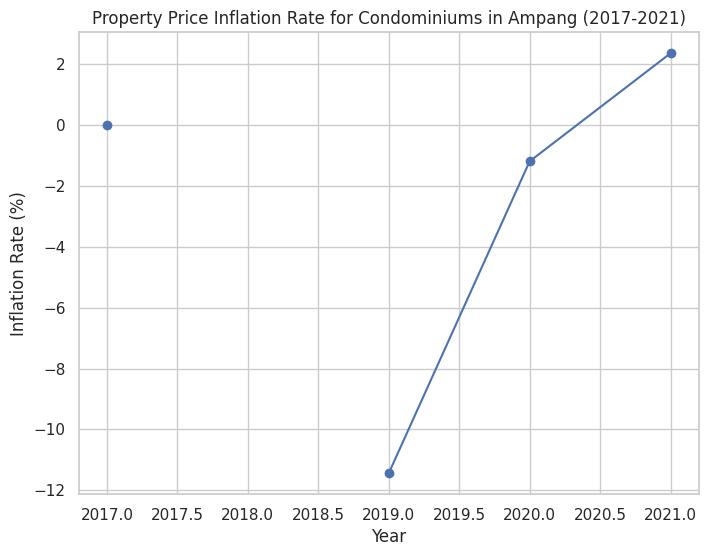

In [ ]:
years = [2017, 2018, 2019, 2020, 2021]

# Filter data and calculate average prices for each year
average_prices = [] # Initialize an empty list to store average prices

for year in years:
    data_year = df[df['YEAR'] == year] # Filter data for the specific year
    average_price = data_year['price_per_sqm'].mean() # Calculate the average price for that year
    average_prices.append(average_price) # Append the average price to the list

# Calculate the inflation rate relative to the base year (2017)
first_year = average_prices[0]
inflation_rates = [(price - first_year) / first_year * 100 for price in average_prices]
print(inflation_rates)
print()

# Create a line graph for the inflation rate
plt.figure(figsize=(8, 6))
plt.plot(years, inflation_rates, marker='o', linestyle='-')
plt.title('Property Price Inflation Rate for Condominiums in Ampang (2017-2021)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)

# Show the graph
plt.show()

## Inferential Question

**Rates of property appreciation rates across different neighborhoods within the Ampang district

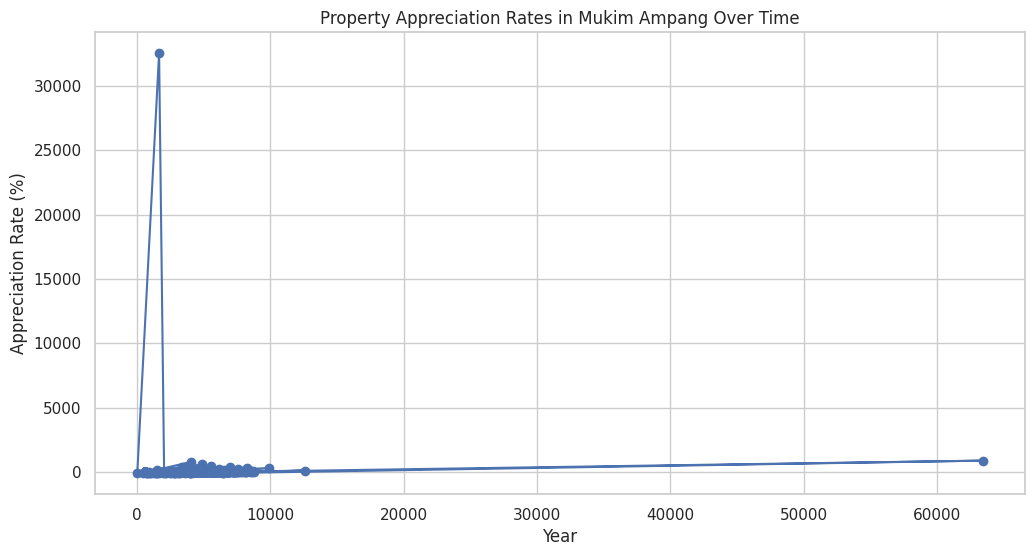

In [ ]:
# Assuming your dataset columns: 'DISTRICT', 'YEAR', 'PRICE'
# 'DISTRICT' represents the neighborhood or district, 'YEAR' is the year of valuation, and 'PRICE' is the property price

# Filter data for 'Mukim Ampang' district
mukim_ampang_data = df[df['DISTRICT'] == 'Mukim Ampang']

# Calculate annual property appreciation rates for 'Mukim Ampang'
mukim_ampang_data['APPRECIATION_RATE'] = mukim_ampang_data['price_per_sqm'].pct_change() * 100

# Remove rows with missing appreciation rates (e.g., for the first year)
mukim_ampang_data = mukim_ampang_data.dropna(subset=['APPRECIATION_RATE'])

# Visualize property appreciation rates over time
plt.figure(figsize=(12, 6))
plt.plot(mukim_ampang_data['price_per_sqm'], mukim_ampang_data['APPRECIATION_RATE'], marker='o', linestyle='-')
plt.title('Property Appreciation Rates in Mukim Ampang Over Time')
plt.xlabel('Year')
plt.ylabel('Appreciation Rate (%)')
plt.grid(True)
plt.show()

##Predictive Question

**The average price of residential properties in the Ampang district in the next year

In [ ]:
# Sort the data by year
df.sort_values(by='YEAR', inplace=True)

# Calculate the average annual price increase
df['Price_Difference'] = df['price_per_sqm'].diff()
average_annual_increase = df['Price_Difference'].mean()

# Predict the price for the next year
current_year = datetime.now().year
next_year = current_year + 1
predicted_price = df['price_per_sqm'].iloc[-1] + average_annual_increase

print(f"Average annual price increase: {average_annual_increase}")
print(f"Predicted average price for {next_year}: {predicted_price}")

Average annual price increase: nan
Predicted average price for 2024: nan


## Causal Question

**Causal relationship between the year of valuation and property price

Average Property Prices:
    YEAR                        PRO_TYPE  price_per_sqm
0   2017       1 - 1 1/2 Storey Terraced    3181.060000
1   2017       2 - 2 1/2 Storey Terraced    4559.863636
2   2017           Condominium/Apartment    5769.011964
3   2017                        Detached    3106.148000
4   2017                            Flat    2978.439063
5   2017                   Low-Cost Flat    2334.685625
6   2017                      Town House    6664.802857
7   2017                     Vacant Plot    2127.660000
8   2018       1 - 1 1/2 Storey Terraced    3455.612000
9   2018  2 - 2 1/2 Storey Semi-Detached    3707.080000
10  2018       2 - 2 1/2 Storey Terraced    5100.225455
11  2018           Condominium/Apartment    4897.511231
12  2018                        Detached    3609.425000
13  2018                            Flat    1563.606224
14  2018                   Low-Cost Flat            NaN
15  2018                      Town House    7424.671250
16  2018               

<ipython-input-31-fd4b58d70c22>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='YEAR', y='price_per_sqm', hue='PRO_TYPE', data=average_prices,


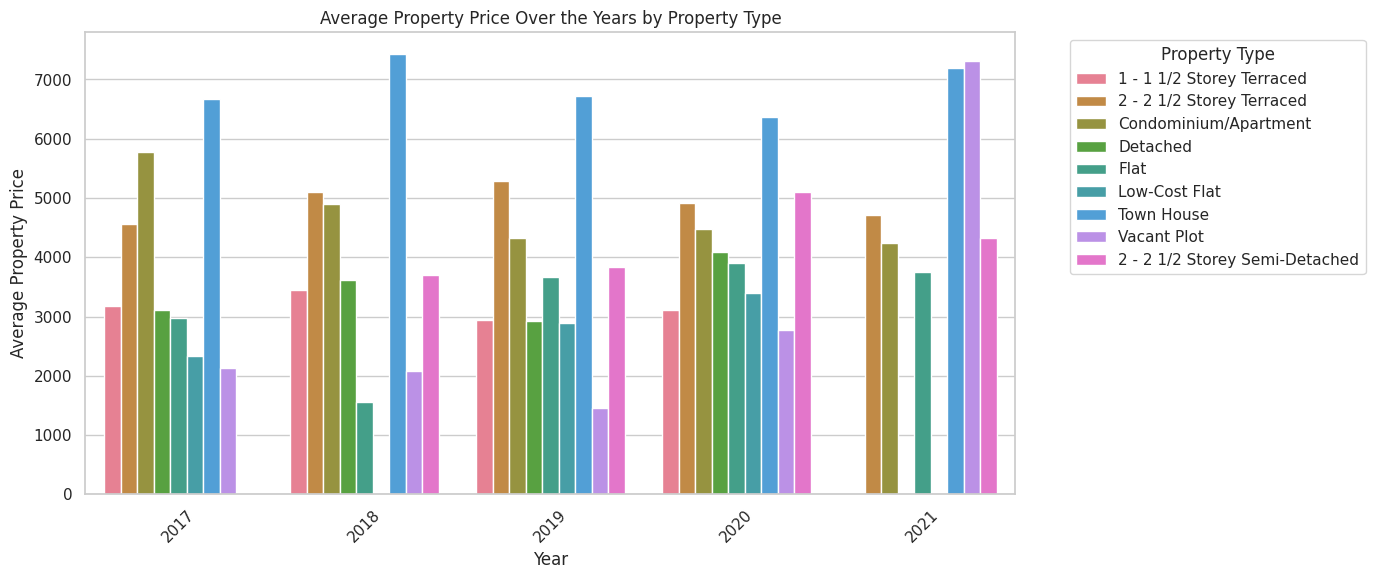

In [31]:
# Calculate the average property price for each year and property type
average_prices = df.groupby(['YEAR', 'PRO_TYPE'])['price_per_sqm'].mean().reset_index()

print("Average Property Prices:")
print(average_prices)

# Set the style of the plot
sns.set(style="whitegrid")

# Create a grouped bar chart using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='YEAR', y='price_per_sqm', hue='PRO_TYPE', data=average_prices,
            palette='husl', ci=None) # Use 'husl' color palette for better color distinguishability

# Set x-axis labels and title
plt.xlabel('Year')
plt.ylabel('Average Property Price')
plt.title('Average Property Price Over the Years by Property Type')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the legend
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

## Mechanistic Question

**The correlation between the lot size of properties in this district and their sale prices

Correlations between Lot Size and Price by Property Type:
    YEAR                        PRO_TYPE   level_2  price_per_sqm
0   2017       1 - 1 1/2 Storey Terraced  LOT_SIZE       1.000000
1   2017       2 - 2 1/2 Storey Terraced  LOT_SIZE      -0.384246
2   2017           Condominium/Apartment  LOT_SIZE      -0.245627
3   2017                        Detached  LOT_SIZE      -0.352898
4   2017                            Flat  LOT_SIZE       0.517989
5   2017                   Low-Cost Flat  LOT_SIZE       0.444853
6   2017                      Town House  LOT_SIZE      -0.742241
7   2017                     Vacant Plot  LOT_SIZE            NaN
8   2018       1 - 1 1/2 Storey Terraced  LOT_SIZE      -0.418699
9   2018  2 - 2 1/2 Storey Semi-Detached  LOT_SIZE       0.504711
10  2018       2 - 2 1/2 Storey Terraced  LOT_SIZE      -0.097912
11  2018           Condominium/Apartment  LOT_SIZE      -0.342267
12  2018                        Detached  LOT_SIZE       0.318783
13  2018          

<ipython-input-30-3bf6d513b84e>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = correlations.pivot('YEAR', 'PRO_TYPE', 'price_per_sqm')


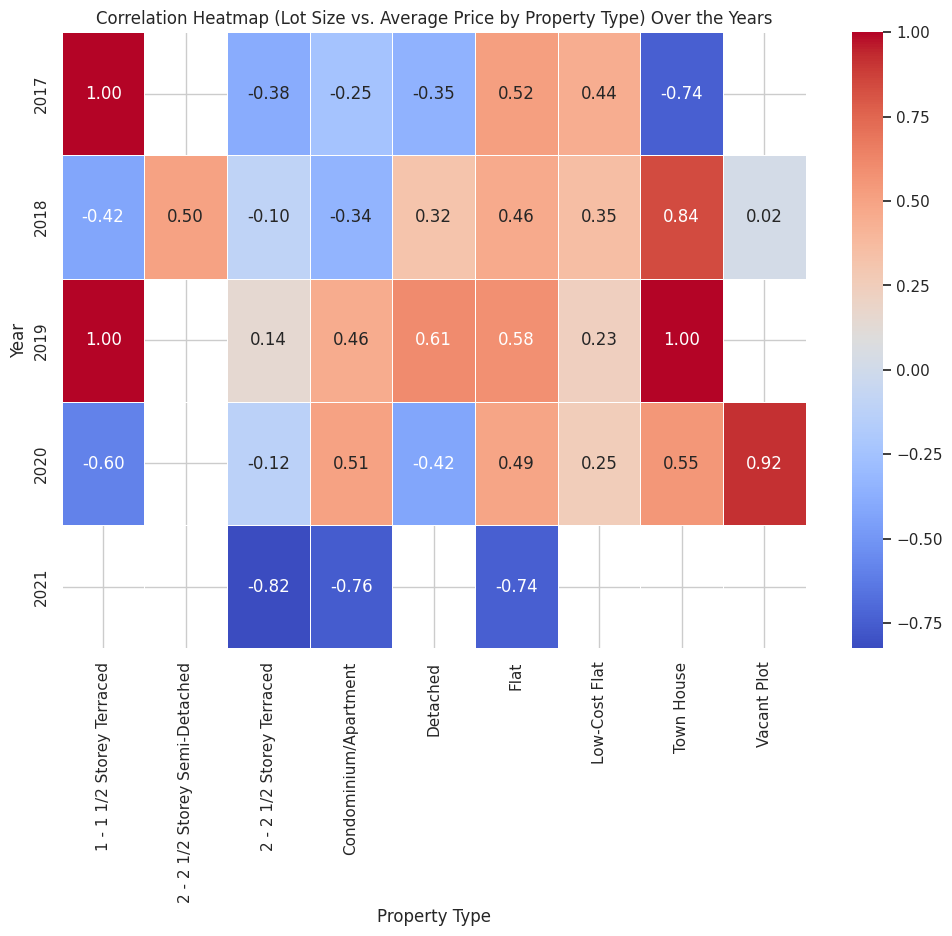

In [ ]:
# Group data by 'YEAR' and 'PRO_TYPE' and calculate correlations
correlations = df.groupby(['YEAR', 'PRO_TYPE'])[['LOT_SIZE', 'price_per_sqm']].corr().iloc[0::2, -1].reset_index()

print("Correlations between Lot Size and Price by Property Type:")
print(correlations)

# Create a pivot table for the heatmap
pivot_table = correlations.pivot('YEAR', 'PRO_TYPE', 'price_per_sqm')

# Set the size of the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set plot title and labels
plt.title('Correlation Heatmap (Lot Size vs. Average Price by Property Type) Over the Years')
plt.xlabel('Property Type')
plt.ylabel('Year')

# Show the plot
plt.show()

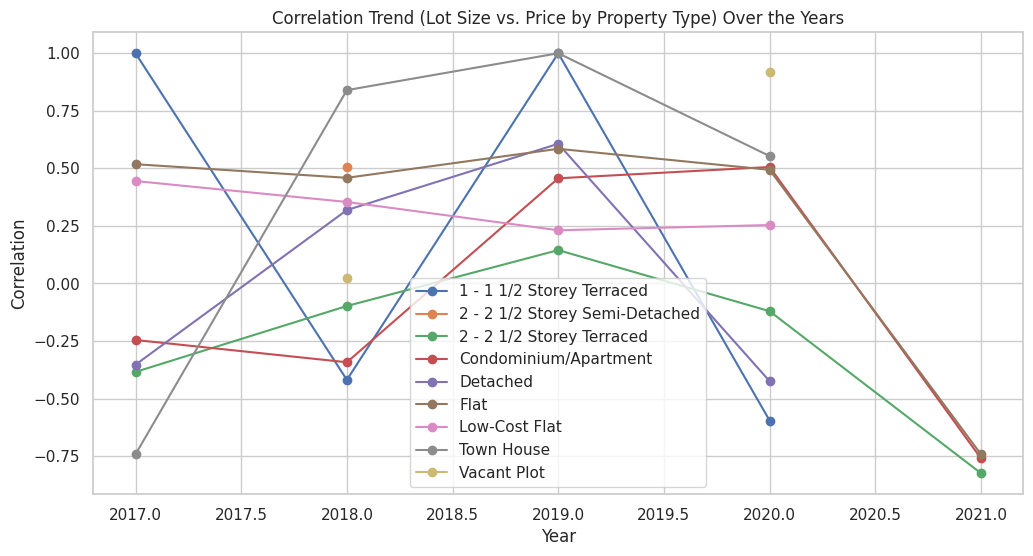

In [ ]:
# Plot a line chart to show the correlation trend over the years for each property type
plt.figure(figsize=(12, 6))
for property_type in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[property_type], marker='o', label=property_type)

# Set plot title and labels
plt.xlabel('Year')
plt.ylabel('Correlation')
plt.title('Correlation Trend (Lot Size vs. Price by Property Type) Over the Years')
plt.legend()
plt.grid(True)

# Show the line chart
plt.show()